# Hypothesis Testing

Ho = Null Hypothesis     

H1 = Alternative Hypothesis

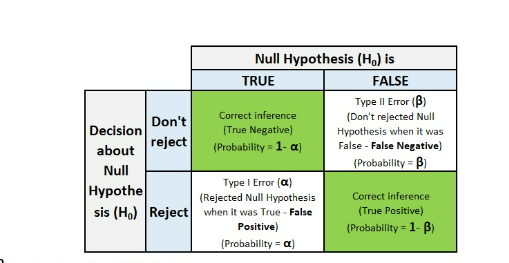

A p-value is given by programs to evaluate the results of hypothesis tests. This value makes it easier to comment on the hypothesis tests result.

Alpha : The significance level, also known as alpha or α, is a measure of the strength of the evidence that must be present in your sample before you will reject the null hypothesis and conclude that the effect is statistically significant.

P Value :The P value is a number, calculated from a statistical test, that describes how likely you are to have found a particular set of observations if the null hypothesis were true. P values are used in hypothesis testing to help decide whether to reject the null hypothesis.

Usually to make things easier. If the result found is P < 0.05, Ho can be rejected. Because alpha is taken as 0.05 .

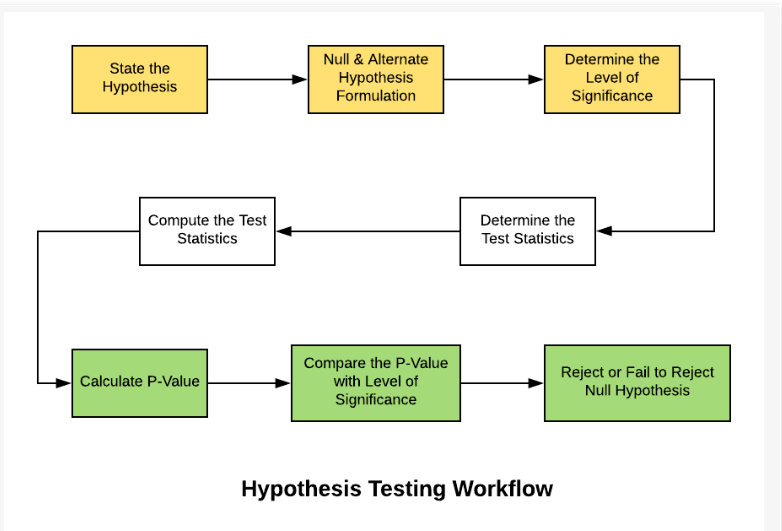

# 1-)One Sample T Test

The one-sample t-test is used when we want to know whether our sample comes from a particular population but we do not have full population information available to us.

**Hypotheses:**

<d><i>H</i><sub>0</sub>: <i>μ</i> = <i>50</i></d>   
<d><i>H</i><sub>1</sub>: <i>μ</i> ≠ <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> <= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> > <i>50</i></d><br><br>

<d><i>H</i><sub>0</sub>: <i>μ</i> >= <i>50</i></d><br>
<d><i>H</i><sub>1</sub>: <i>μ</i> < <i>50</i></d><br><br>




<table></table>

**Test t:**

${\displaystyle t={\frac {{\bar {x}}-\mu _{0}}{\frac {s}{\sqrt {n}}}}}$


### Real Case :
Q : Is the average time spent on the website really 170 seconds?     


* There are same average of spent time which are taken sources.

Ho = 170 s 
H1 != 170 s

In [1]:
import numpy as np
import scipy.stats as stats

Examines = np.array([17, 160, 234, 149, 145, 107, 197, 75, 201, 225, 211, 119, 
              157, 145, 127, 244, 163, 114, 145,  65, 112, 185, 202, 146,
              203, 224, 203, 114, 188, 156, 187, 154, 177, 95, 165, 50, 110, 
              216, 138, 151, 166, 135, 155, 84, 251, 173, 131, 207, 121, 120])
 

In [2]:
Sample = Examines[0:10]

In [3]:
stats.describe(Sample)

DescribeResult(nobs=10, minmax=(17, 234), mean=151.0, variance=4752.222222222223, skewness=-0.618643768615812, kurtosis=-0.5525333918192303)

### One-Sample T-test Assumption
#### Normal Assumptions

Ho: There is no difference between the sample distribution and the theoretical distribution.


H1: There is a difference between the sample distribution and the theoretical distribution

#### 1-)Shapiro-Wilk Test

In [4]:
from scipy.stats import shapiro

In [5]:
print("T : " + str(shapiro(Examines)[0]))
print("P-value: " + str(shapiro(Examines)[1]))

T : 0.9853101372718811
P-value: 0.7848551869392395


P value is bigger than alpha.0.7>0.05. Therefore, Ho can net be rejected.

#### 2-)QQPLOT

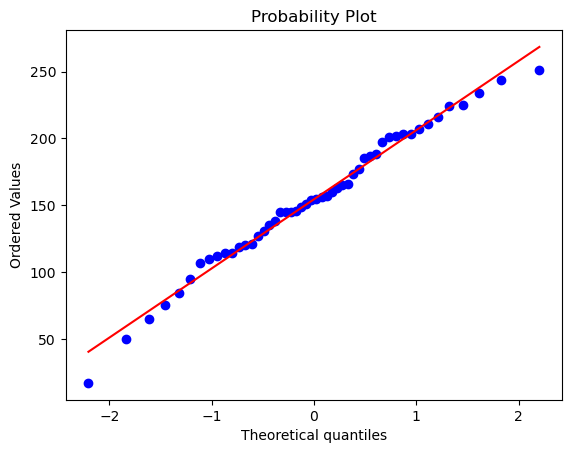

In [6]:
import pylab
stats.probplot(Examines, dist="norm", plot=pylab)
pylab.show()

Graph confirming the Ho hypothesis.

#### If this assumption would be negative, we should apply Nonparametric One Sample Test    
from statsmodels.stats.descriptivestats import sign_test      

sign_test(Examines, 170)

### Application of Hypothesis Testing

In [10]:
stats.ttest_1samp(Examines, popmean = 170)

Ttest_1sampResult(statistic=-2.1753117985877966, pvalue=0.034460415195071446)

Ho = 170 s   
H1 != 170 s


P values is smaller than Alpha (0.03<0.05). Hence, Ho is rejected. This means that mean time spent of web site is not 170 second.

# 2-)One Sample Proportion Test

To compare a proportion of responses or values in a sample of data to a (hypothesized) proportion in the population from which our sample data are drawn.

### Real Case :
As a result of the advertisement, a conversion rate of 0.125 was achieved. But since this rate is very high, it is requested to test it.
* In spite of the fact that Adv was clicked by 500 people, merely 40 people shopped.
* Hence, calculated conversion rate is 40/500 = 0.08
* Each conversion ratio are different

HO: p = 0.125

H1: p != 0.125

In [11]:
from statsmodels.stats.proportion import proportions_ztest
count = 40
nobs = 500
value = 0.125
proportions_ztest(count, nobs, value)

(-3.7090151628513017, 0.0002080669689845979)

In [12]:
print("Z : " + str(proportions_ztest(count, nobs, value)[0]))
print("P-value: " + str(proportions_ztest(count, nobs, value)[1]))

Z : -3.7090151628513017
P-value: 0.0002080669689845979


P value < Alpha; 0.002 < 0.05. So, Ho is rejected.This means that a conversion rate is not 0.125 with 95% confidance.

In [13]:
import pandas as pd

# 3-)Independent Two-Sample T-Test(AB Test)

What is A/B testing? A/B testing (also known as split testing or bucket testing) is a method of comparing two versions of a webpage or app against each other to determine which one performs better.    
There are two assumptions:    
1-) Normal : Shapiro-Wilk Test, QQPLOT  
2-) Variance Homogeneity: Levene    

### Real Case:
An investment has been made in a ML project. It is desired to test whether there is a significant difference by comparing the income generated as a result of the estimates it produces and the income generated by the old system.      
* Users are divivded into 2 different grups which are named A and B respectively.   
* A: Old System / B: New System    
* It is desired to test whether a meaningful work is done in terms of income.   

## Step 1
Ho:  M1 = M2  Old system and New system are same in terms of income.    
H1:  M1!= M2  Old system and New system are not same in terms of income.   

## Step 2:
Converting the receiving data sets to the appropriate format.

In [14]:
#Data Set 1
A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])


A_B = pd.concat([A, B], axis = 1)
A_B.columns = ["A","B"]

A_B.head()

,A,B
0,30,37
1,27,39
2,21,31
3,27,31
4,29,34


In [15]:
#Data Set 2
import pandas as pd

A = pd.DataFrame([30,27,21,27,29,30,20,20,27,32,35,22,24,23,25,27,23,27,23,
        25,21,18,24,26,33,26,27,28,19,25])

B = pd.DataFrame([37,39,31,31,34,38,30,36,29,28,38,28,37,37,30,32,31,31,27,
        32,33,33,33,31,32,33,26,32,33,29])

#For A
GROUP_A = np.arange(len(A))
GROUP_A = pd.DataFrame(GROUP_A)
GROUP_A[:] = "A"
A = pd.concat([A, GROUP_A], axis = 1)

#For B
GROUP_B = np.arange(len(B))
GROUP_B = pd.DataFrame(GROUP_B)
GROUP_B[:] = "B"
B = pd.concat([B, GROUP_B], axis = 1)

#Whole Data Sets
AB = pd.concat([A,B])
AB.columns = ["Income","GROUP"]
print(AB.head())
print(AB.tail())

   Income GROUP
0      30     A
1      27     A
2      21     A
3      27     A
4      29     A
    Income GROUP
25      33     B
26      26     B
27      32     B
28      33     B
29      29     B


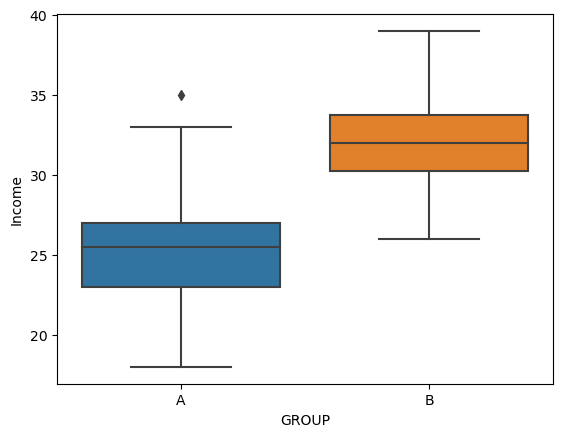

In [16]:
import seaborn as sns
sns.boxplot(x = "GROUP", y = "Income", data = AB);

## Step 3: Assumptions

We should apply both assumptions.

#### 1-) Normal
##### Sharpio-Milk Test

Ho: There is no difference between the sample distribution and the theoretical distribution.


H1: There is a difference between the sample distribution and the theoretical distribution

In [17]:
from scipy.stats import shapiro
print("P-value For A: " + str(shapiro(A_B.A)[1]))
print("P-value For B: " + str(shapiro(A_B.B)[1]))


P-value For A: 0.7962851524353027
P-value For B: 0.24584470689296722


P values are higher than Alpha. Therefore, normal assumption is provided. This means that There is no difference between the sample distribution and the theoretical distribution.(Ho) 

#### 2-)Variance Homogeneity   
Ho: Variances are homogeneous.   
H1: Variances are NOT homogeneous.    

#### Levene 

In [18]:
stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=1.1101802757158004, pvalue=0.2964124900636569)

P values are higher than Alpha.This means that Variances are homogeneous.Ho can not be rejected.

***Both Assumptions can be rejected, so we can continue.***

If two assumptions would be refused, ***Nonparametric Independent Two-Sample Test*** would be applied.

***Nonparametric Independent Two-Sample Test***

test, pvalue = stats.mannwhitneyu(A_B["A"], A_B["B"])   

print('Test  = %.4f, p-value = %.4f' % (test, pvalue))


##  Step 4: Hypothesis Test


In [19]:
test_St, Pvalue = stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)
print('Test St = %.4f, P-Value = %.4f' % (test_St, Pvalue))

Test St = -7.0287, P-Value = 0.0000


P value is smaller than Alpha, hence Ho can be rejected. This means that there are difference between new system and old system.

# 4-) Pair Two-Sample T-Test

The dependent samples t-test is used to compare the sample means from two related groups. This means that the scores for both groups being compared come from the same people. The purpose of this test is to determine if there is a change from one measurement (group) to the other.     
There are two assumptions:    
1-) Normal : Shapiro-Wilk Test, QQPLOT    
2-) Variance Homogeneity: Levene     

### Real Case:
It is desired to ensure whether the training is useful or not.
* Measures are calculated both before and after training.
* Those measures are desired to be tested.

In [20]:
before = pd.DataFrame([123,119,119,116,123,123,121,120,117,118,121,121,123,119,
            121,118,124,121,125,115,115,119,118,121,117,117,120,120,
            121,117,118,117,123,118,124,121,115,118,125,115])

after = pd.DataFrame([118,127,122,132,129,123,129,132,128,130,128,138,140,130,
             134,134,124,140,134,129,129,138,134,124,122,126,133,127,
             130,130,130,132,117,130,125,129,133,120,127,123])

## Step 1:
Ho:  M1 = M2  Before training and after training are same in terms of outputs.    
H1:  M1!= M2  Before training and after training are NOT same in terms of outputs.  

## Step 2: Arrange Data Sets

In [21]:
#1 Data Set
Y = pd.concat([before, after], axis = 1)
Y.columns = ["before","after"]
print("'Separate' Data Set: \n\n ", Y.head(), "\n\n")


#2 Data Set
#FLAG/TAG
X = np.arange(len(before))
X = pd.DataFrame(X)
X[:] = "before"
A = pd.concat([before, X], axis = 1)


#FLAG/TAG
Z = np.arange(len(after))
Z = pd.DataFrame(Z)
Z[:] = "after"
B = pd.concat([after, Z], axis = 1)

#Combine the entire dataset
Together = pd.concat([A,B])
Together

#Named
Together.columns = ["PERFORMANS","Before_After"]
print("'Together' Data Set: \n\n", Together.head(), "\n")

'Separate' Data Set: 

     before  after
0     123    118
1     119    127
2     119    122
3     116    132
4     123    129 


'Together' Data Set: 

    PERFORMANS Before_After
0         123       before
1         119       before
2         119       before
3         116       before
4         123       before 



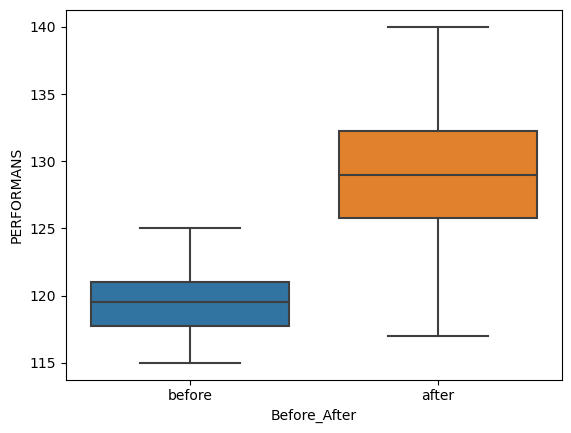

In [22]:
sns.boxplot(x = "Before_After", y = "PERFORMANS", data = Together);

## Step 3:

We should apply both assumptions.    
#### 1-) Normal


#### Sharpio-Milk Test  

Ho: There is no difference between the sample distribution and the theoretical distribution.

H1: There is a difference between the sample distribution and the theoretical distribution

In [23]:
from scipy.stats import shapiro
print("P-value For A: " + str(shapiro(Y.before)[1]))
print("P-value For B: " + str(shapiro(Y.after)[1]))

P-value For A: 0.10722016543149948
P-value For B: 0.6159630417823792


P values are higher than Alpha. Therefore, normal assumption is provided. This means that There is no difference between the sample distribution and the theoretical distribution.(Ho)

#### 2-)Variance Homogeneity   
Ho: Variances are homogeneous.   
H1: Variances are NOT homogeneous.    

#### Levene 

In [24]:
stats.levene(Y.before, Y.after)

LeveneResult(statistic=8.31303288672351, pvalue=0.0050844511807370246)

This assumption could not be met. Therefore,Instead of hypothesis testing, it would be more appropriate to use a ***Nonparametric Dependent Two-Sample Test***. However, to avoid confusion, this test will be covered here. 


***Nonparametric Dependent Two-Sample Test***             
stats.wilcoxon(Y.before, Y.after)          

test, pvalue = stats.wilcoxon(Y["before"], Y["after"])              

print('Test = %.4f, p-değeri = %.4f' % (test, pvalue))                


## Step 4: Hipotez Testi

In [25]:
stats.wilcoxon(Y.before, Y.after)

C:\Users\BiLKANCOMPUTERS\.conda\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=15.0, pvalue=2.491492033374464e-07)

In [28]:
test, pvalue = stats.wilcoxon(Y["before"], Y["after"])

print('Test = %.4f, P-Value = %.4f' % (test, pvalue))

Test = 15.0000, P-Value = 0.0000


P value is smaller than Alpha. Hence Ho is rejected. This means, training impacts.

# 5-) Two Sample Ratio Test

Two sample Z test of proportions is the test to determine whether the two populations differ significantly on specific characteristics. In other words, compare the proportion of two different populations that have some single characteristic.

### Real Case(AB Test):      
It is desired to find which button color is preferred more on the website.
* Yellow Button: 1000 Views; 300 Cliks     
* Red Button :1100 Views ; 250 Cliks

Ho: P1 = P2
H1 : P1 != P2

In [29]:
from statsmodels.stats.proportion import proportions_ztest

In [30]:
import numpy as np
Number_successes = np.array([300, 250])
Number_observations= np.array([1000, 1100])

In [31]:
proportions_ztest(count = Number_successes, nobs = Number_observations)

(3.7857863233209255, 0.0001532232957772221)

P value is lower than Alpha. Ho is rejected. This means that there are differences between yellow button and red button.